In [ ]:
import os

import matplotlib.animation as animation
import matplotlib.pyplot as plt
import pandas as pd
import torch

In [40]:
activations = torch.load(
    "activations/ei/mazes/daily-armadillo-3361/activations.pt"
)
activations.keys()

/tmp/ipykernel_323520/1228098981.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  activations = torch.load(


dict_keys(['x', 'label', 'model_outputs', 'outs', 'h_pyrs', 'h_inters', 'pred'])

In [41]:
# Convert activations (which is a list of dicts, where the inner dicts are column names) to a pandas df
df = pd.DataFrame(activations)
df

,x,label,model_outputs,outs,h_pyrs,h_inters,pred
0,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",[tensor(1)],"[[tensor(-3.1790), tensor(3.1626)]]","[[[tensor([[[ 0.0227]],\n\n [[ 0.0525]]...","[[[tensor([[[-0.0078, -0.0078, -0.0078, ..., ...","[[[tensor([[[0., 0., 0., ..., 0., 0., 0.],\n ...",[tensor(1)]
1,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",[tensor(0)],"[[tensor(7.5633), tensor(-7.6089)]]","[[[tensor([[[ 0.0227]],\n\n [[ 0.0525]]...","[[[tensor([[[-0.0078, -0.0078, -0.0078, ..., ...","[[[tensor([[[0., 0., 0., ..., 0., 0., 0.],\n ...",[tensor(0)]
2,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",[tensor(1)],"[[tensor(-7.1505), tensor(7.1243)]]","[[[tensor([[[ 0.0176]],\n\n [[ 0.0487]]...","[[[tensor([[[-0.0078, -0.0078, -0.0078, ..., ...","[[[tensor([[[0., 0., 0., ..., 0., 0., 0.],\n ...",[tensor(1)]
3,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",[tensor(0)],"[[tensor(8.6108), tensor(-8.6487)]]","[[[tensor([[[ 0.0174]],\n\n [[ 0.0487]]...","[[[tensor([[[-0.0078, -0.0078, -0.0078, ..., ...","[[[tensor([[[0., 0., 0., ..., 0., 0., 0.],\n ...",[tensor(0)]
4,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",[tensor(1)],"[[tensor(-4.7341), tensor(4.7140)]]","[[[tensor([[[ 0.0233]],\n\n [[ 0.0535]]...","[[[tensor([[[-0.0078, -0.0078, -0.0078, ..., ...","[[[tensor([[[0., 0., 0., ..., 0., 0., 0.],\n ...",[tensor(1)]
5,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",[tensor(0)],"[[tensor(6.4209), tensor(-6.4611)]]","[[[tensor([[[ 0.0230]],\n\n [[ 0.0534]]...","[[[tensor([[[-0.0078, -0.0078, -0.0078, ..., ...","[[[tensor([[[0., 0., 0., ..., 0., 0., 0.],\n ...",[tensor(0)]
6,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",[tensor(1)],"[[tensor(-11.2807), tensor(11.2187)]]","[[[tensor([[[ 0.0265]],\n\n [[ 0.0542]]...","[[[tensor([[[-0.0078, -0.0078, -0.0078, ..., ...","[[[tensor([[[0., 0., 0., ..., 0., 0., 0.],\n ...",[tensor(1)]
7,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",[tensor(0)],"[[tensor(6.8630), tensor(-6.9178)]]","[[[tensor([[[ 0.0266]],\n\n [[ 0.0542]]...","[[[tensor([[[-0.0078, -0.0078, -0.0078, ..., ...","[[[tensor([[[0., 0., 0., ..., 0., 0., 0.],\n ...",[tensor(0)]
8,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",[tensor(1)],"[[tensor(-7.1065), tensor(7.0816)]]","[[[tensor([[[ 0.0152]],\n\n [[ 0.0485]]...","[[[tensor([[[-0.0078, -0.0078, -0.0078, ..., ...","[[[tensor([[[0., 0., 0., ..., 0., 0., 0.],\n ...",[tensor(1)]
9,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...",[tensor(0)],"[[tensor(11.1123), tensor(-11.1692)]]","[[[tensor([[[ 0.0151]],\n\n [[ 0.0485]]...","[[[tensor([[[-0.0078, -0.0078, -0.0078, ..., ...","[[[tensor([[[0., 0., 0., ..., 0., 0., 0.],\n ...",[tensor(0)]


In [42]:
sample_test = df.iloc[0]
sample_test

x                [[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...
label                                                  [tensor(1)]
model_outputs                  [[tensor(-3.1790), tensor(3.1626)]]
outs             [[[tensor([[[ 0.0227]],\n\n        [[ 0.0525]]...
h_pyrs           [[[tensor([[[-0.0078, -0.0078, -0.0078,  ..., ...
h_inters         [[[tensor([[[0., 0., 0.,  ..., 0., 0., 0.],\n ...
pred                                                   [tensor(1)]
Name: 0, dtype: object

In [43]:
sample_test.h_pyrs[-1].shape

torch.Size([20, 1, 32, 48, 48])

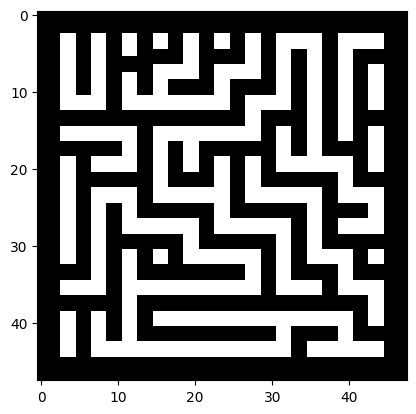

In [44]:
plt.imshow(sample_test.x.squeeze()[:3].permute(1, 2, 0))
plt.show()

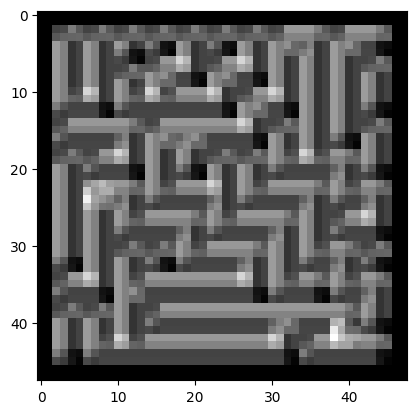

In [ ]:
plt.imshow(sample_test.h_pyrs[-1].squeeze()[0].sum(dim=0), cmap="gray")
plt.show()

In [52]:
fps = 5
save_dir = "visualizations"
os.makedirs(save_dir, exist_ok=True)

for i, sample in df.iterrows():
    plt.imsave(
        f"{save_dir}/x_maze_{i}.png",
        sample.x.squeeze()[:3].permute(1, 2, 0).numpy(),
    )
    plt.imsave(
        f"{save_dir}/x_start_end_{i}.png",
        sample.x.squeeze()[3].numpy(),
        cmap="viridis",
    )
    for activation in ("h_pyrs", "h_inters"):
        # Assuming 'sample' is your data object containing h_pyrs
        hs = sample[activation][-1].squeeze()

        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(8, 8))

        # Initialize the plot with the first frame
        im = ax.imshow(hs[0].sum(dim=0).cpu().numpy(), cmap="viridis")

        # Function to update the frame
        def update(frame):
            im.set_array(hs[frame].sum(dim=0).cpu().numpy())
            return [im]

        # Create the animation
        anim = animation.FuncAnimation(
            fig, update, frames=len(hs), interval=1000 / fps, blit=True
        )

        # Display the animation in the notebook
        # display(HTML(anim.to_jshtml()))

        # Save the animation as an MP4 file
        anim.save(
            f"{save_dir}/{activation}_{i}.mp4",
            writer="ffmpeg",
            fps=fps,
        )

        plt.close(fig)